## Modelo de Regeressão - Irrigação

In [2]:
# ! pip install --upgrade pip
#! pip install seaborn
# ! pip install scikit-learn
#! pip install statsmodels
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [3]:
df_irriga = pd.read_csv('dados_de_irrigacao.csv')

In [4]:
df_irriga.head()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


In [5]:
df_irriga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [6]:
df_irriga.isna()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
294,False,False,False
295,False,False,False
296,False,False,False
297,False,False,False


In [7]:
df_irriga.columns = ['Horas','Area', 'AreaIrrigadaAngulo']

In [8]:
df_irriga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horas               299 non-null    int64  
 1   Area                299 non-null    int64  
 2   AreaIrrigadaAngulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [9]:
df_irriga.head()

,Horas,Area,AreaIrrigadaAngulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


In [10]:
df_irriga.Horas.sum()

np.int64(44850)

In [11]:
df_irriga.sum()

Horas                   44850.0
Area                  4485000.0
AreaIrrigadaAngulo    2990000.0
dtype: float64

In [12]:
df_irriga.mean()

Horas                   150.0
Area                  15000.0
AreaIrrigadaAngulo    10000.0
dtype: float64

In [13]:
df_irriga.std()

Horas                   86.458082
Area                  8645.808233
AreaIrrigadaAngulo    5763.872155
dtype: float64

In [14]:
df_irriga.describe()

,Horas,Area,AreaIrrigadaAngulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


In [15]:
df_irriga[['Horas', 'Area']].describe()

,Horas,Area
count,299.000000,299.000000
mean,150.000000,15000.000000
std,86.458082,8645.808233
min,1.000000,100.000000
25%,75.500000,7550.000000
50%,150.000000,15000.000000
75%,224.500000,22450.000000
max,299.000000,29900.000000


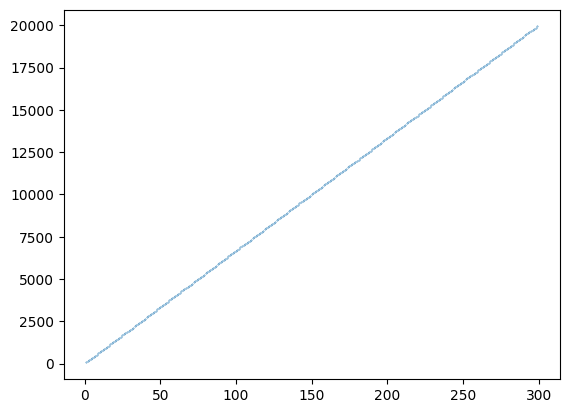

In [16]:

plt.scatter(df_irriga.Horas, df_irriga.AreaIrrigadaAngulo, s=0.1)
plt.show()

<Axes: xlabel='AreaIrrigadaAngulo', ylabel='Horas'>

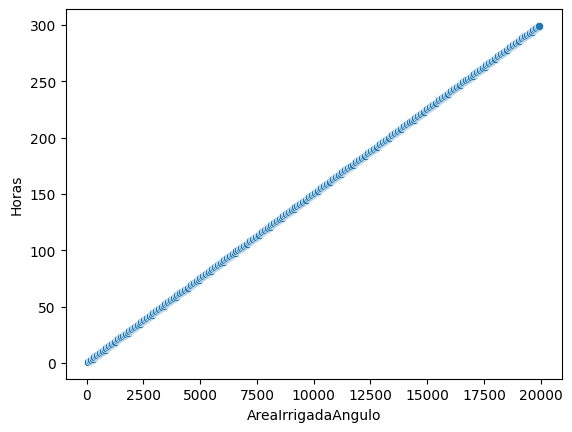

In [17]:
sns.scatterplot(data=df_irriga, y='Horas', x='AreaIrrigadaAngulo')

<Axes: >

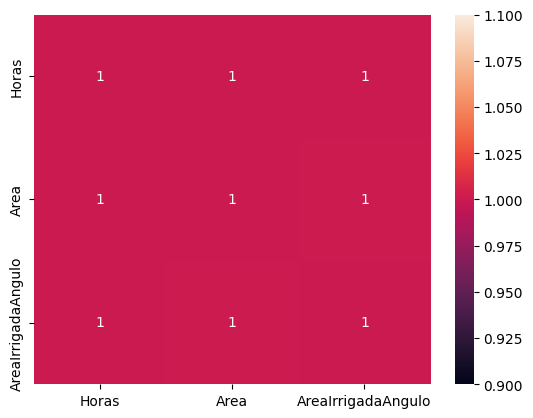

In [18]:
sns.heatmap(df_irriga.corr('pearson'), annot=True)

<Axes: >

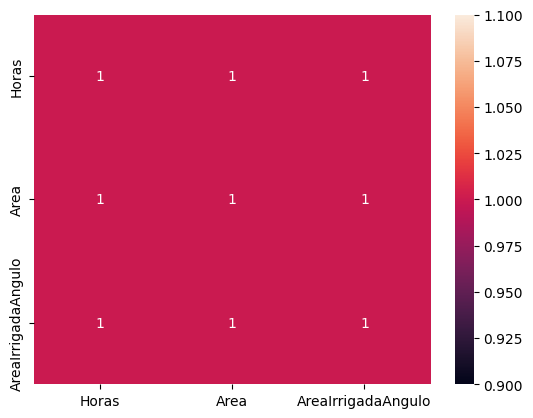

In [19]:
sns.heatmap(df_irriga.corr('spearman'), annot=True)

In [20]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape

X = df_irriga['Horas'].values.reshape(-1,1)
y = df_irriga['AreaIrrigadaAngulo'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [21]:
# Instaciar o modelo de regressao

reg_model = LinearRegression()

In [22]:
# Treinar Modelo

reg_model.fit(X_train, y_train)

LinearRegression()

In [23]:
#Alfa
reg_model.coef_[0][0]

np.float64(66.66666666666666)

In [24]:
#Beta
reg_model.intercept_[0]

np.float64(0.0)

In [25]:
print('A equaçaão da reta é y = {:4f}x + {:4f}'.format(reg_model.coef_[0][0], reg_model.intercept_[0]))


A equaçaão da reta é y = 66.666667x + 0.000000


In [26]:
# Predição dos valores com base nos valores de teste
y_pred = reg_model.predict(X_test)

In [27]:
# Calcular métrica R-squared ou Coeficiente de Determinação
# R2 - Representa a proporção na variação na variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

1.0

In [28]:
# Calcular Métrica MAE (Mean Absolute Error)
# Diferença entre o valor predito e o valor de teste (Erro estimado)
# MAE = Media (y_test - y_pred)
# É métrica fácil de interpretar
# MAE é menos sensível a outliers porque não considera os erros quadráticos
mean_absolute_error(y_test, y_pred)

1.3272938303998672e-12

In [29]:
# Calcular métrica MSE (Meas Squared Error)
# MSE = Média (y_test - y_pred)ˆ2
# Não é uma métrica de fácil interpretação
# Sensível aos outiers tende a penalizar elevando os erros ao quadrado
mean_squared_error(y_test, y_pred)

3.1080036997941056e-24

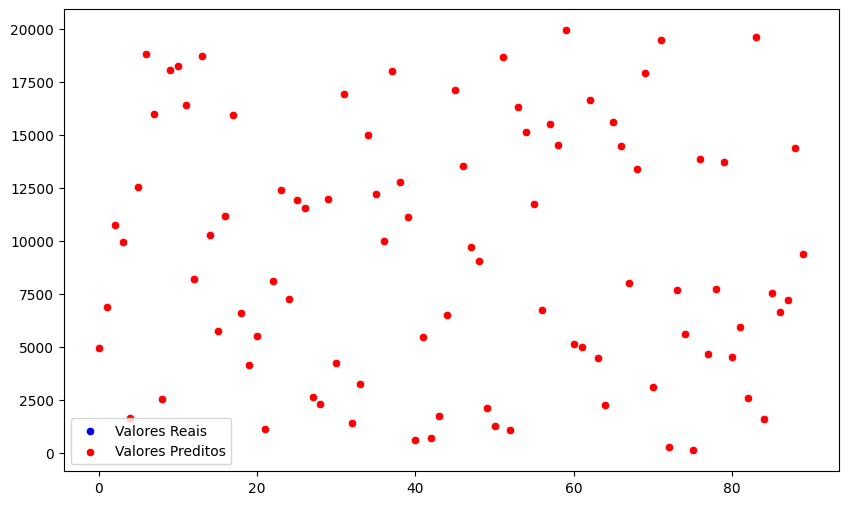

In [30]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

In [31]:
# Análise de Resíduos
residuos = y_test - y_pred


In [32]:
# Calcular os residuos padronizados (Standardization)
# Que para elemento de um conjunto (X-medio)/ desvio padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

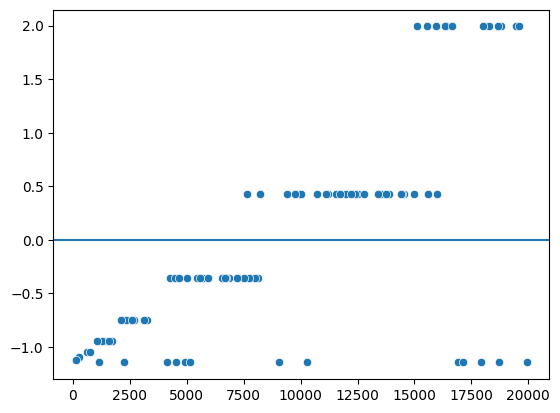

In [33]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e +2 (na escala padrão) - indica linearidade
# Verificar homogeneidade das variância (Homocedasticidade)
# Valor estiver em torno da reta, temos homocedasticidade, caso contráRecursionError
# Se tivermos alguma tendência ou padrão (cone ou funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1),y=residuos_std.reshape(-1))
plt.axhline(y=0)

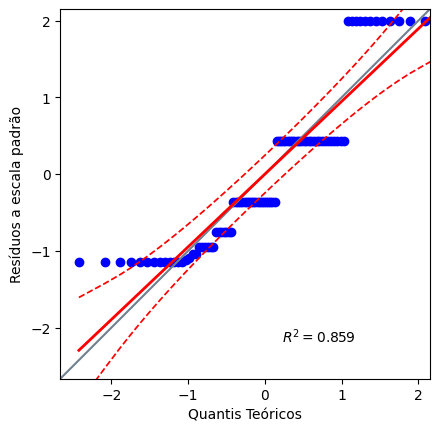

In [34]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-QUantile) Plot, que avalia se a distribuiçao segue normal
# ! pip install pingouin
import pingouin as pg 
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos a escala padrão')
plt.show()

In [35]:
# Estatística do Teste e o P Value (Valor de Confiança) - quanto mais próximo de 1 melhor
# Se o resíduo segue 
# A hipotese (h0) nula diz que segue um distribuiçao normal
# A hipotese (h1) alternativa nao segue uma distribuicao normal
# Se o P-valor > 0.05 não rejeita h0, caso contrário rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print('Estatística do Teste: {} e P-Valor: {}'.format(stat_shapiro,p_valor_shapiro))

Estatística do Teste: 0.8493787607407111 e P-Valor: 4.024114882918386e-08


In [36]:
# Estatística do Teste e o P Value (Valor de Confiança) - quanto mais próximo de 1 melhor
# Se o resíduo segue 
# A hipotese (h0) nula diz que segue um distribuiçao normal
# A hipotese (h1) alternativa nao segue uma distribuicao normal
# Se o P-valor > 0.05 não rejeita h0, caso contrário rejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print('Estatística do Teste: {} e P-Valor: {}'.format(stat_ks,p_valor_ks))

Estatística do Teste: 0.5 e P-Valor: 2.4869515015725988e-21


In [41]:
# se for irigado durante 15 horas, qual será minha area irrigada ângulo
reg_model.predict([[15]])

array([[1000.]])